In [117]:
#from google.colab import drive
#drive.mount('/content/drive')

In [118]:
import pandas as pd
import numpy as np

In [119]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [120]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [121]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [122]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [123]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=7:
        a.append(i)

In [124]:
df = df.drop(a)

In [125]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55056 entries, 0 to 428543
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            55056 non-null  int64  
 1   Month           55056 non-null  int64  
 2   ppt(mm)         55056 non-null  int64  
 3   tmax(degC)      55056 non-null  float64
 4   tmin(degC)      55056 non-null  float64
 5   aet(mm)         55056 non-null  int64  
 6   PDSI(unitless)  55056 non-null  float64
 7   state           55056 non-null  object 
 8   district        55056 non-null  object 
 9   cluster14       55056 non-null  int64  
 10  cluster15       55056 non-null  int64  
 11  cluster18       55056 non-null  int64  
 12  cluster20       55056 non-null  int64  
 13  cluster25       55056 non-null  int64  
 14  cluster27       55056 non-null  int64  
 15  cluster30       55056 non-null  int64  
 16  cluster35       55056 non-null  int64  
dtypes: float64(3), int64(12), obje

In [127]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(55056, 8)

In [128]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [129]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
0,1958,1,0,32.1,16.6,2,-0.1,solapur,1-1958
1,1958,2,0,34.2,18.4,2,-0.5,solapur,2-1958
2,1958,3,17,38.5,21.5,17,0.2,solapur,3-1958
3,1958,4,32,40.2,25.3,32,0.8,solapur,4-1958
4,1958,5,68,40.5,25.8,65,1.5,solapur,5-1958


In [130]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
0,1958,1,0,32.1,16.6,2,-0.1,solapur,1958-01-01,1
1,1958,2,0,34.2,18.4,2,-0.5,solapur,1958-02-01,1
2,1958,3,17,38.5,21.5,17,0.2,solapur,1958-03-01,1
3,1958,4,32,40.2,25.3,32,0.8,solapur,1958-04-01,1
4,1958,5,68,40.5,25.8,65,1.5,solapur,1958-05-01,1


In [132]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
0,1958,1,0,2,-0.1,solapur,1958-01-01,1,24.35
1,1958,2,0,2,-0.5,solapur,1958-02-01,1,26.30
2,1958,3,17,17,0.2,solapur,1958-03-01,1,30.00
3,1958,4,32,32,0.8,solapur,1958-04-01,1,32.75
4,1958,5,68,65,1.5,solapur,1958-05-01,1,33.15


In [133]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
428539,2019,8,293,131,2.2,sikar,2019-08-01,1,29.45
428540,2019,9,56,100,2.9,sikar,2019-09-01,1,29.35
428541,2019,10,2,29,3.0,sikar,2019-10-01,1,26.25
428542,2019,11,31,39,4.1,sikar,2019-11-01,1,21.15
428543,2019,12,6,11,3.8,sikar,2019-12-01,1,13.50


In [134]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,13,23.15,14,solapur
1,1981-02-01,0,26.50,1,solapur
2,1981-03-01,17,29.45,17,solapur
3,1981-04-01,14,32.55,14,solapur
4,1981-05-01,38,32.90,36,solapur


In [135]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
732,2019,1,0,1,-2.1,solapur,2019-01-01,1,23.00
733,2019,2,0,0,-2.1,solapur,2019-02-01,1,26.65
734,2019,3,0,1,-2.2,solapur,2019-03-01,1,31.05
735,2019,4,4,4,-2.4,solapur,2019-04-01,1,34.25
736,2019,5,2,2,-3.3,solapur,2019-05-01,1,35.60
...,...,...,...,...,...,...,...,...,...
428539,2019,8,293,131,2.2,sikar,2019-08-01,1,29.45
428540,2019,9,56,100,2.9,sikar,2019-09-01,1,29.35
428541,2019,10,2,29,3.0,sikar,2019-10-01,1,26.25
428542,2019,11,31,39,4.1,sikar,2019-11-01,1,21.15


In [136]:
from fbprophet import Prophet

In [137]:

model = Prophet()

In [138]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
33739,2018-08-01,131,29.50,131,sikar
33740,2018-09-01,54,28.35,71,sikar
33741,2018-10-01,1,26.10,9,sikar
33742,2018-11-01,1,20.85,5,sikar
33743,2018-12-01,3,15.35,6,sikar


In [141]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [142]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [143]:

forecast = model.predict(fut)

In [144]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,26.495229,26.260746,32.508959,26.465161,26.527852,2.646715,2.646715,2.646715,2.646715,2.646715,2.646715,0.0,0.0,0.0,29.141944
465,2019-09-30,26.500944,24.494630,30.415650,26.462312,26.544620,0.856667,0.856667,0.856667,0.856667,0.856667,0.856667,0.0,0.0,0.0,27.357611
466,2019-10-31,26.506850,19.874926,26.267708,26.452429,26.560991,-3.426712,-3.426712,-3.426712,-3.426712,-3.426712,-3.426712,0.0,0.0,0.0,23.080138
467,2019-11-30,26.512565,14.429684,20.475430,26.444852,26.574388,-9.016964,-9.016964,-9.016964,-9.016964,-9.016964,-9.016964,0.0,0.0,0.0,17.495600
468,2019-12-31,26.518470,14.226891,20.336530,26.434549,26.589905,-9.212150,-9.212150,-9.212150,-9.212150,-9.212150,-9.212150,0.0,0.0,0.0,17.306320


In [145]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,29.141944,26.260746,32.508959
465,2019-09-30,27.357611,24.494630,30.415650
466,2019-10-31,23.080138,19.874926,26.267708
467,2019-11-30,17.495600,14.429684,20.475430
468,2019-12-31,17.306320,14.226891,20.336530


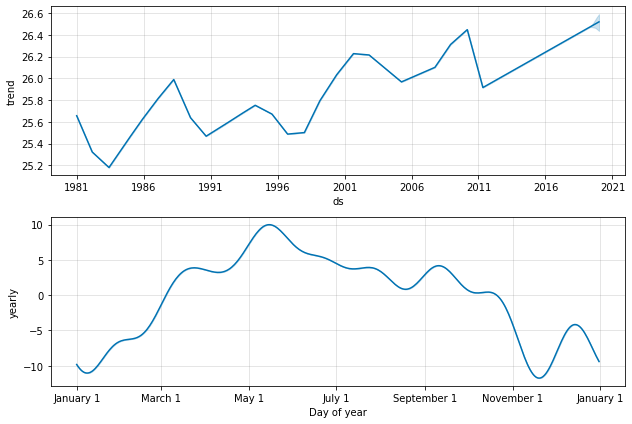

In [146]:
fig2 = model.plot_components(forecast)

In [147]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (888, 1)
20.005261330322952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,23.00,1,19.845725
1,12.15,1,19.845725
2,12.55,1,19.845725
3,14.30,1,19.845725
4,19.45,1,19.845725
...,...,...,...
883,22.30,12,17.306320
884,20.55,12,17.306320
885,12.30,12,17.306320
886,22.40,12,17.306320


In [148]:
import matplotlib.pyplot as plt

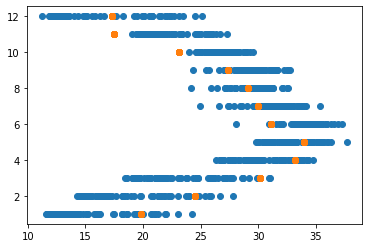

In [149]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [150]:
import pickle

In [151]:
filename = 'Cluster 15 - 7.sav'
pickle.dump(model, open(filename, 'wb'))

In [152]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [153]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,25.656536,12.912696,18.917805,25.656536,25.656536,-9.824707,-9.824707,-9.824707,-9.824707,-9.824707,-9.824707,0.0,0.0,0.0,15.831829
1,1981-02-01,25.632176,16.171216,22.079724,25.632176,25.632176,-6.480209,-6.480209,-6.480209,-6.480209,-6.480209,-6.480209,0.0,0.0,0.0,19.151968
2,1981-03-01,25.610174,21.234694,27.312147,25.610174,25.610174,-1.318124,-1.318124,-1.318124,-1.318124,-1.318124,-1.318124,0.0,0.0,0.0,24.292050
3,1981-04-01,25.585814,25.984281,32.127721,25.585814,25.585814,3.560384,3.560384,3.560384,3.560384,3.560384,3.560384,0.0,0.0,0.0,29.146198
4,1981-05-01,25.562241,29.674422,35.804111,25.562241,25.562241,7.197007,7.197007,7.197007,7.197007,7.197007,7.197007,0.0,0.0,0.0,32.759248
